In [119]:
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [120]:
from google.colab import drive
drive.mount('/content/drive')
# Load the dataset
data = pd.read_csv('drive/MyDrive/emot.csv')

# Display the first few rows to verify it loaded correctly
print(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
                                                text emotions
0  i feel awful about it too because it s my job ...  sadness
1                              im alone i feel awful  sadness
2  ive probably mentioned this before but i reall...      joy
3           i was feeling a little low few days back  sadness
4  i beleive that i am much more sensitive to oth...     love


In [121]:
data['emotions'].unique()

array(['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
      dtype=object)

In [122]:
import pandas as pd

# Map the values in the 'emotions' column
label_map = {
    "sadness": 0,
    "joy": 1,
    "love": 2,
    "anger": 3,
    "fear": 4,
    "surprise": 5
}

data['emotions'] = data['emotions'].map(label_map)

In [123]:
data.head()

,text,emotions
0,i feel awful about it too because it s my job ...,0
1,im alone i feel awful,0
2,ive probably mentioned this before but i reall...,1
3,i was feeling a little low few days back,0
4,i beleive that i am much more sensitive to oth...,2


In [124]:
data.shape

(416809, 2)

# Data Preprocessing (Text Cleaning & Feature Engineering)

In [125]:
import pandas as pd
import re
import numpy as np
!pip install unidecode
from unidecode import unidecode
import string


import matplotlib.pyplot as plt
import seaborn as sns
import collections
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

In [126]:
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('punkt_tab')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

# Function to clean and preprocess headlines
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = text.translate(str.maketrans("", "", string.punctuation))  # Remove punctuation
    words = word_tokenize(text)  # Tokenization
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Lemmatization
    return " ".join(words)

# Apply text cleaning to text
data["Cleaned_text"] = data["text"].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [127]:
data.head()

,text,emotions,Cleaned_text
0,i feel awful about it too because it s my job ...,0,feel awful job get position succeed happen
1,im alone i feel awful,0,im alone feel awful
2,ive probably mentioned this before but i reall...,1,ive probably mentioned really feel proud actua...
3,i was feeling a little low few days back,0,feeling little low day back
4,i beleive that i am much more sensitive to oth...,2,beleive much sensitive people feeling tend com...


# Exploratory Data Analysis (EDA)

In [128]:
# Display the first few rows to understand the structure
print("First 5 rows of the dataset:")
print(data.head())

First 5 rows of the dataset:
                                                text  emotions  \
0  i feel awful about it too because it s my job ...         0   
1                              im alone i feel awful         0   
2  ive probably mentioned this before but i reall...         1   
3           i was feeling a little low few days back         0   
4  i beleive that i am much more sensitive to oth...         2   

                                        Cleaned_text  
0         feel awful job get position succeed happen  
1                                im alone feel awful  
2  ive probably mentioned really feel proud actua...  
3                        feeling little low day back  
4  beleive much sensitive people feeling tend com...  


a classification label, with possible values including sadness (0), joy (1), love (2), anger (3), fear (4) and surprise(5)

In [129]:
# Basic information about the dataset
print("\nDataset Info:")
data.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   text          416809 non-null  object
 1   emotions      416809 non-null  int64 
 2   Cleaned_text  416809 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.5+ MB


In [130]:
# Checking for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
text            0
emotions        0
Cleaned_text    0
dtype: int64


In [131]:
# Summary statistics
print("\nSummary Statistics:")
print(data.describe(include='all'))


Summary Statistics:
                                                 text       emotions  \
count                                          416809  416809.000000   
unique                                         393822            NaN   
top     i feel more adventurous willing to take risks            NaN   
freq                                               16            NaN   
mean                                              NaN       1.554271   
std                                               NaN       1.490453   
min                                               NaN       0.000000   
25%                                               NaN       0.000000   
50%                                               NaN       1.000000   
75%                                               NaN       3.000000   
max                                               NaN       5.000000   

         Cleaned_text  
count          416809  
unique         381941  
top     feel accepted  
freq              

In [132]:
# Checking unique values in each colum
for column in data.columns:
    unique_values = data[column].nunique()
    print(f"\nUnique values in {column}: {unique_values}")


Unique values in text: 393822

Unique values in emotions: 6

Unique values in Cleaned_text: 381941


# Visualization

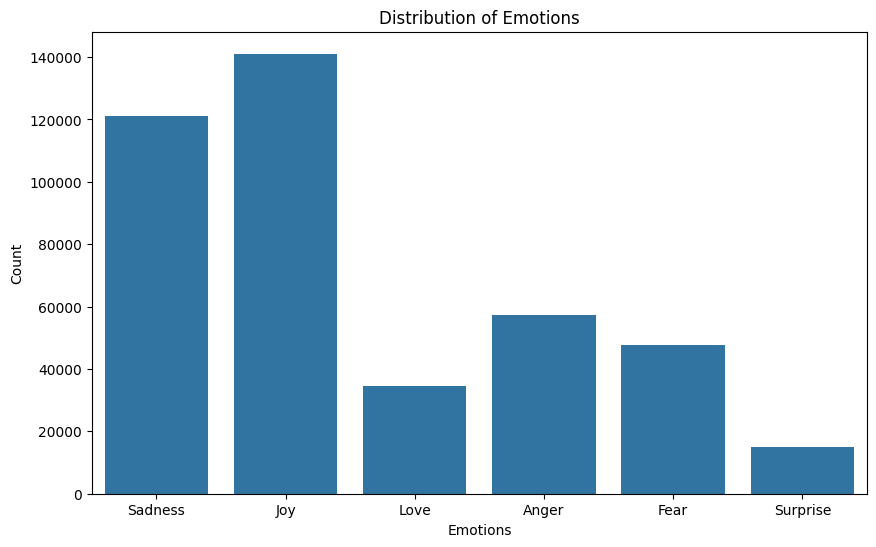

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map numeric labels to emotion names
emotion_mapping = {
    0: 'Sadness',
    1: 'Joy',
    2: 'Love',
    3: 'Anger',
    4: 'Fear',
    5: 'Surprise'
}
data['emotions'] = data['emotions'].map(emotion_mapping)  # Replace labels with names

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='emotions')

plt.title("Distribution of Emotions")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()

In [134]:
# ✅ Ensure the column is created
data["Cleaned_text_length"] = data["Cleaned_text"].apply(len)

# ✅ Now run the checks
print(data.head())  # Check data structure
print(data["emotions"].unique())  # Check unique labels
print(data["Cleaned_text_length"].describe())  # Summary of sentence lengths

                                                text emotions  \
0  i feel awful about it too because it s my job ...  Sadness   
1                              im alone i feel awful  Sadness   
2  ive probably mentioned this before but i reall...      Joy   
3           i was feeling a little low few days back  Sadness   
4  i beleive that i am much more sensitive to oth...     Love   

                                        Cleaned_text  Cleaned_text_length  
0         feel awful job get position succeed happen                   42  
1                                im alone feel awful                   19  
2  ive probably mentioned really feel proud actua...                   97  
3                        feeling little low day back                   27  
4  beleive much sensitive people feeling tend com...                   56  
['Sadness' 'Joy' 'Love' 'Anger' 'Fear' 'Surprise']
count    416809.000000
mean         61.013423
std          34.824852
min           0.000000
25%       

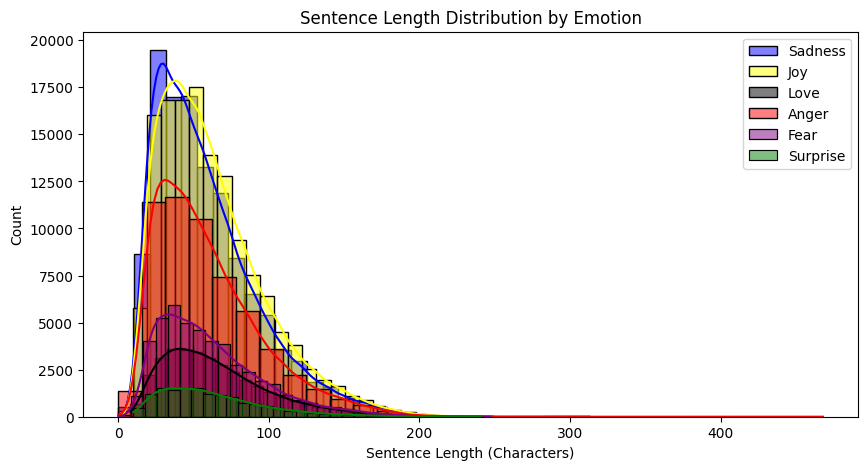

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Plot the distribution using emotion names
plt.figure(figsize=(10, 5))

# Plot for each emotion
sns.histplot(data[data["emotions"] == "Sadness"]["Cleaned_text_length"], bins=30, label="Sadness", kde=True, color="blue", alpha=0.5)
sns.histplot(data[data["emotions"] == "Joy"]["Cleaned_text_length"], bins=30, label="Joy", kde=True, color="yellow", alpha=0.5)
sns.histplot(data[data["emotions"] == "Love"]["Cleaned_text_length"], bins=30, label="Love", kde=True, color="black", alpha=0.5)
sns.histplot(data[data["emotions"] == "Anger"]["Cleaned_text_length"], bins=30, label="Anger", kde=True, color="red", alpha=0.5)
sns.histplot(data[data["emotions"] == "Fear"]["Cleaned_text_length"], bins=30, label="Fear", kde=True, color="purple", alpha=0.5)
sns.histplot(data[data["emotions"] == "Surprise"]["Cleaned_text_length"], bins=30, label="Surprise", kde=True, color="green", alpha=0.5)

# ✅ Add labels and legend
plt.legend()
plt.title("Sentence Length Distribution by Emotion")
plt.xlabel("Sentence Length (Characters)")
plt.ylabel("Count")
plt.show()

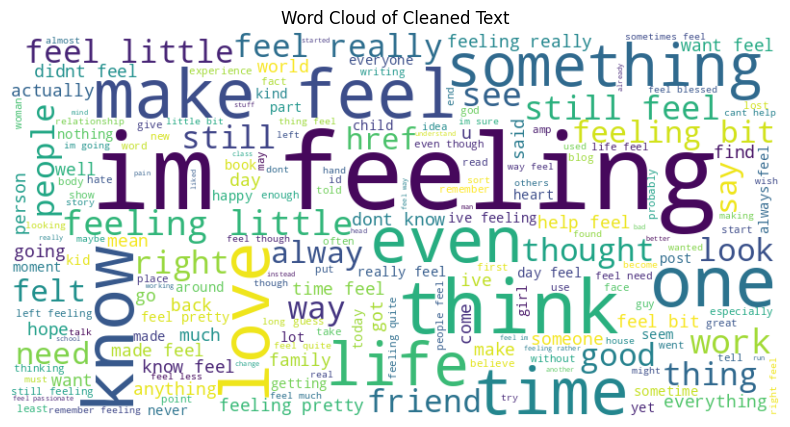

In [136]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ✅ Generate Word Cloud using "Cleaned_text" column
text = " ".join(data["Cleaned_text"])

# ✅ Create the Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# ✅ Plot the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Cleaned Text")
plt.show()

# Fixing the labels

0


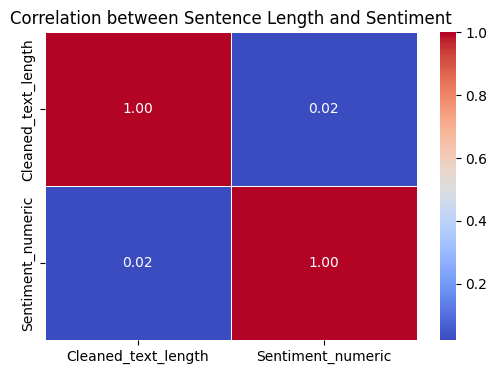

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Map the label to a meaningful numeric value
emotion_mapping = {
    "Sadness": 0,
    "Joy": 1,
    "Love": 2,
    "Anger": 3,
    "Fear": 4,
    "Surprise": 5  # Added missing label
}

# ✅ Apply mapping
data["Sentiment_numeric"] = data["emotions"].map(emotion_mapping)

# ✅ Check for unmapped values
print(data["Sentiment_numeric"].isna().sum())  # Should be 0 if all mapped correctly

# ✅ Add a column for sentence length
data["Cleaned_text_length"] = data["Cleaned_text"].apply(len)

# ✅ Compute correlation
correlation = data[["Cleaned_text_length", "Sentiment_numeric"]].corr()

# ✅ Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation between Sentence Length and Sentiment")
plt.show()

# Checking class Imbalance

<ipython-input-138-e597efb2a83e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='emotions', data=data, order=data['emotions'].value_counts().index, palette="viridis")


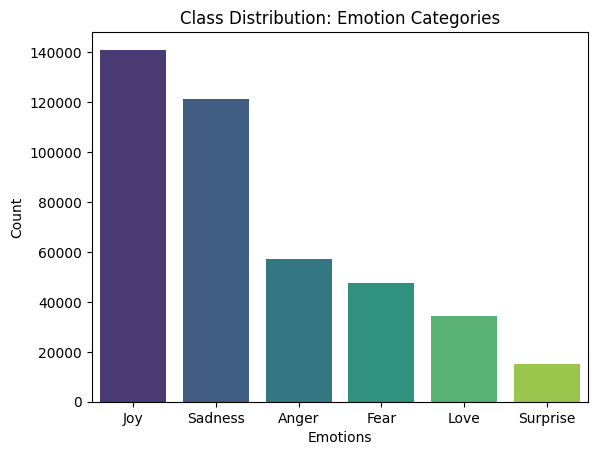


Percentage Distribution:
emotions
Joy         33.844519
Sadness     29.074948
Anger       13.751383
Fear        11.446970
Love         8.290128
Surprise     3.592053
Name: proportion, dtype: float64


In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Visualizing the class imbalance using "label" column
sns.countplot(x='emotions', data=data, order=data['emotions'].value_counts().index, palette="viridis")
plt.title("Class Distribution: Emotion Categories")
plt.xlabel("Emotions")
plt.ylabel("Count")
plt.show()

# ✅ Displaying the percentage split
label_counts = data['emotions'].value_counts(normalize=True) * 100
print("\nPercentage Distribution:")
print(label_counts)

In [139]:
# ✅ Displaying the percentage split using "label" column
label_counts = data['emotions'].value_counts(normalize=True) * 100
print("\nPercentage Distribution:")
print(label_counts)


Percentage Distribution:
emotions
Joy         33.844519
Sadness     29.074948
Anger       13.751383
Fear        11.446970
Love         8.290128
Surprise     3.592053
Name: proportion, dtype: float64


# Model Training

## **Splitting data**

In [140]:
# ✅ Method 1
X = data['Cleaned_text']
y = data['emotions']

# ✅ Method 2
X = data.iloc[:, 2]  # Selects 'Cleaned_text'
y = data.iloc[:, 1]  # Selects 'emotions'

X

,Cleaned_text
0,feel awful job get position succeed happen
1,im alone feel awful
2,ive probably mentioned really feel proud actua...
3,feeling little low day back
4,beleive much sensitive people feeling tend com...
...,...
416804,felt finally accepted bulgarian conservatorie ...
416805,take every day come focussing eating better mo...
416806,suddenly feel everything fake
416807,im feeling eager ever claw back went pear shap...


In [141]:
y

,emotions
0,Sadness
1,Sadness
2,Joy
3,Sadness
4,Love
...,...
416804,Joy
416805,Fear
416806,Sadness
416807,Joy


## **Checking unique values in y**

In [142]:
#method 1
y.unique()

array(['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise'],
      dtype=object)

In [143]:
#method 2
y.value_counts()

,count
emotions,
Joy,141067
Sadness,121187
Anger,57317
Fear,47712
Love,34554
Surprise,14972


<Axes: xlabel='emotions', ylabel='count'>

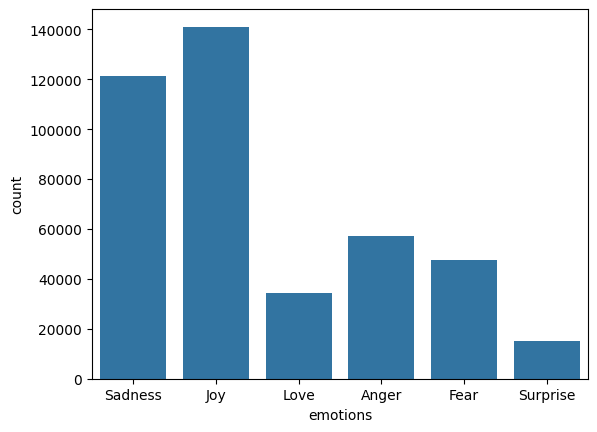

In [144]:
#method 3
sns.countplot(x = y)

## **Preprocessing**

### **Handling  Null**

In [145]:
y.isnull().sum()

np.int64(0)

### **Emotions**

In [146]:
# ✅ Extract each emotion using the "label" column
sadness_data = data[data['emotions'] == 0]  # Sadness
joy_data = data[data['emotions'] == 1]      # Joy
love_data = data[data['emotions'] == 2]     # Love
anger_data = data[data['emotions'] == 3]    # Anger
fear_data = data[data['emotions'] == 4]     # Fear

# ✅ Display results
print("Sadness Data:")
print(sadness_data)

print("\nJoy Data:")
print(joy_data)

print("\nLove Data:")
print(love_data)

print("\nAnger Data:")
print(anger_data)

print("\nFear Data:")
print(fear_data)

Sadness Data:
Empty DataFrame
Columns: [text, emotions, Cleaned_text, Cleaned_text_length, Sentiment_numeric]
Index: []

Joy Data:
Empty DataFrame
Columns: [text, emotions, Cleaned_text, Cleaned_text_length, Sentiment_numeric]
Index: []

Love Data:
Empty DataFrame
Columns: [text, emotions, Cleaned_text, Cleaned_text_length, Sentiment_numeric]
Index: []

Anger Data:
Empty DataFrame
Columns: [text, emotions, Cleaned_text, Cleaned_text_length, Sentiment_numeric]
Index: []

Fear Data:
Empty DataFrame
Columns: [text, emotions, Cleaned_text, Cleaned_text_length, Sentiment_numeric]
Index: []


## WordCloud for each emotion

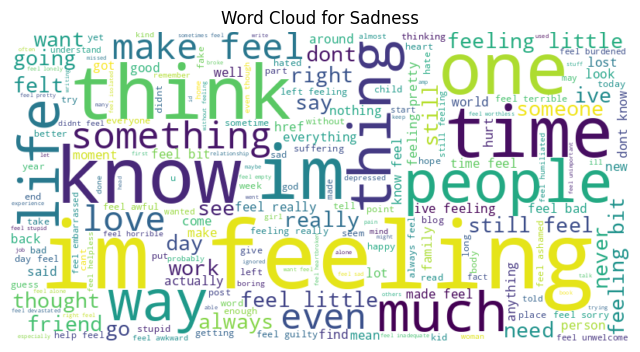

In [147]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sadness_data = data[data["emotions"] == "Sadness"]

def create_wordcloud(data, emotion_name):
    if data.empty:
        print(f"No data available for {emotion_name}, skipping word cloud.")
        return

    text = " ".join(data["Cleaned_text"])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud for {emotion_name}")
    plt.show()

create_wordcloud(sadness_data, "Sadness")

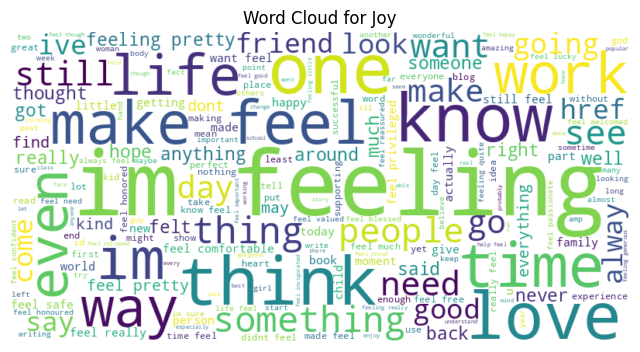

In [148]:
joy_data = data[data["emotions"] == "Joy"]
create_wordcloud(joy_data, "Joy")

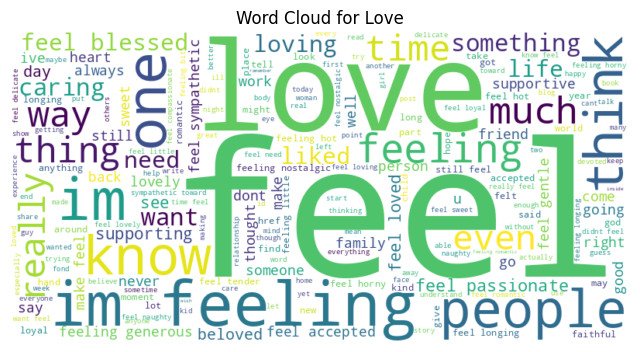

In [149]:
love_data = data[data["emotions"] == "Love"]
create_wordcloud(love_data, "Love")

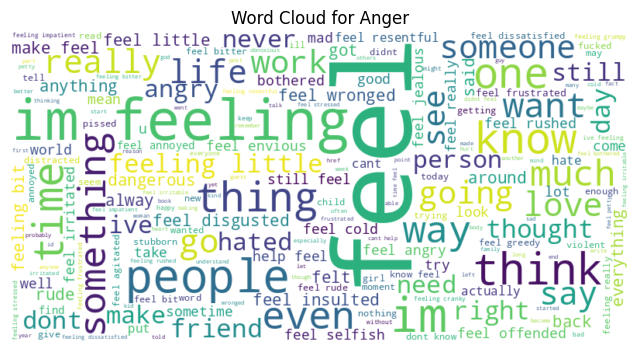

In [150]:
anger_data = data[data["emotions"] == "Anger"]
create_wordcloud(anger_data, "Anger")

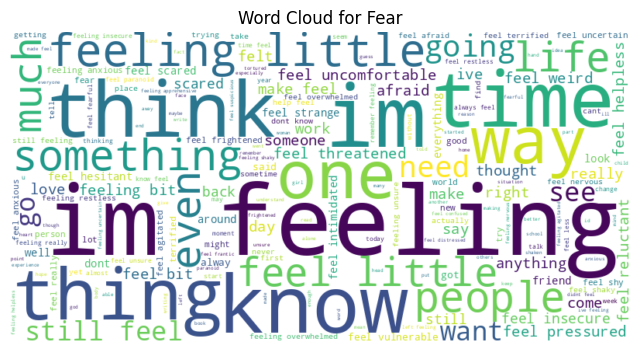

In [151]:
fear_data = data[data["emotions"] == "Fear"]
create_wordcloud(fear_data, "Fear")

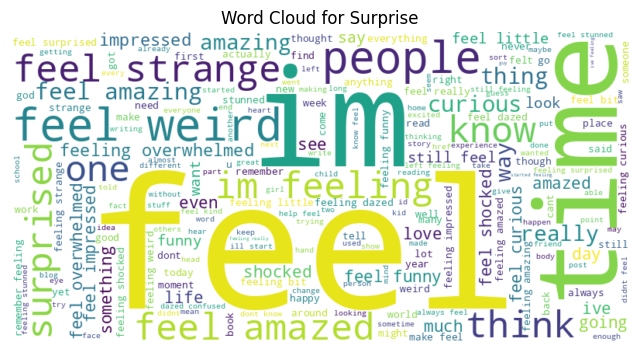

In [152]:
surprise_data = data[data["emotions"] == "Surprise"]
create_wordcloud(surprise_data, "Surprise")

# Vectorizer

In [153]:
from sklearn.feature_extraction.text import CountVectorizer

# ✅ Use Cleaned_text for vectorization
X = data["Cleaned_text"].astype(str)  # Ensure it's a string

# ✅ Apply CountVectorizer
vec = CountVectorizer(stop_words='english')
X_vectorized = vec.fit_transform(X)  # Store transformed data separately

# ✅ Check shape of transformed data
print(X_vectorized.shape)  # (num_samples, num_features)

(416809, 67438)


In [154]:
vec.vocabulary_

{'feel': 20780,
 'awful': 4043,
 'job': 31012,
 'position': 45442,
 'succeed': 57220,
 'happen': 25647,
 'im': 28286,
 'ive': 30353,
 'probably': 46221,
 'mentioned': 37079,
 'really': 48019,
 'proud': 46561,
 'actually': 599,
 'keeping': 31887,
 'new': 40178,
 'year': 66748,
 'resolution': 49342,
 'monthly': 38470,
 'weekly': 65069,
 'goal': 24083,
 'feeling': 20804,
 'little': 34365,
 'low': 34956,
 'day': 14024,
 'beleive': 5317,
 'sensitive': 52423,
 'people': 43790,
 'tend': 58966,
 'compassionate': 11398,
 'frustrated': 22632,
 'christian': 10145,
 'constantly': 12011,
 'talk': 58378,
 'loving': 34950,
 'praying': 45718,
 'seen': 52205,
 'case': 8917,
 'like': 34085,
 'going': 24155,
 'gym': 25220,
 'worthwhile': 66267,
 'hour': 27375,
 'especially': 19200,
 'pleased': 44885,
 'long': 34649,
 'time': 59951,
 'coming': 11245,
 'struggling': 56932,
 'saying': 51499,
 'sweet': 57947,
 'thing': 59540,
 'deserving': 14967,
 'sister': 53940,
 'friendship': 22479,
 'agreed': 1170,
 'car

In [155]:
len(vec.vocabulary_) # to get len of all vocabulary

67438

In [156]:
vec.vocabulary_['ashamed'] # to get no of vocabulary of particalar word

3320

## Splitting

In [157]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=5)

## SMOTE analysis

In [158]:
# ✅ Install imbalanced-learn if not installed
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd

# ✅ Use X_vectorized directly since vectorization is already done
y = data["emotions"]  # Use the existing label column

# ✅ Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# ✅ Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# ✅ Check the new class distribution
print("New class distribution:\n", pd.Series(y_resampled).value_counts())

New class distribution:
 emotions
Fear        112820
Sadness     112820
Joy         112820
Anger       112820
Love        112820
Surprise    112820
Name: count, dtype: int64


<Axes: xlabel='emotions', ylabel='count'>

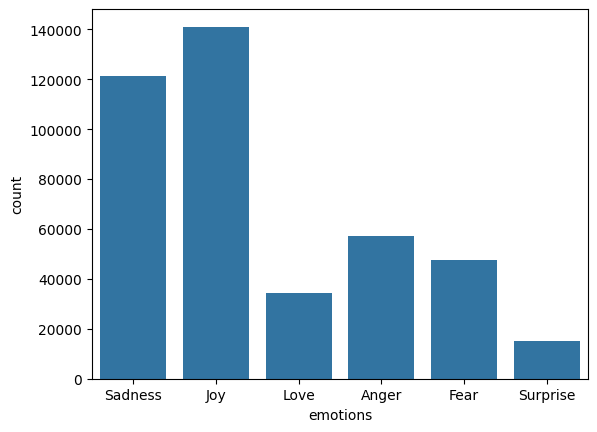

In [159]:
sns.countplot(x = y)

## **Training model**

In [160]:
mnb = MultinomialNB()
mnb.fit(X_train,y_train)

MultinomialNB()

In [161]:
mnb.score(X_train,y_train)

0.8925616364819596

In [162]:
mnb.score(X_test,y_test)

0.8675175739545596

In [163]:
mnb.classes_ #the sequence of confussion matrix

array(['Anger', 'Fear', 'Joy', 'Love', 'Sadness', 'Surprise'], dtype='<U8')

## Model Evaluation

In [164]:
y_pred = mnb.predict(X_test)
cm = confusion_matrix(y_pred,y_test)
cm

array([[ 9675,   384,   157,    52,   402,    30],
       [  288,  7715,   166,    39,   297,   695],
       [  373,   386, 26372,  2157,   709,   742],
       [   47,    24,   675,  4348,    81,    28],
       [  948,   782,   826,   254, 22982,   322],
       [    8,    85,    51,     3,    33,  1226]])

In [165]:
# Display accuracy and classification report
from sklearn.metrics import accuracy_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display accuracy and classification report
print(f"Model Accuracy: {accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.8675

Classification Report:
              precision    recall  f1-score   support

       Anger       0.90      0.85      0.88     11339
        Fear       0.84      0.82      0.83      9376
         Joy       0.86      0.93      0.89     28247
        Love       0.84      0.63      0.72      6853
     Sadness       0.88      0.94      0.91     24504
    Surprise       0.87      0.40      0.55      3043

    accuracy                           0.87     83362
   macro avg       0.86      0.76      0.80     83362
weighted avg       0.87      0.87      0.86     83362



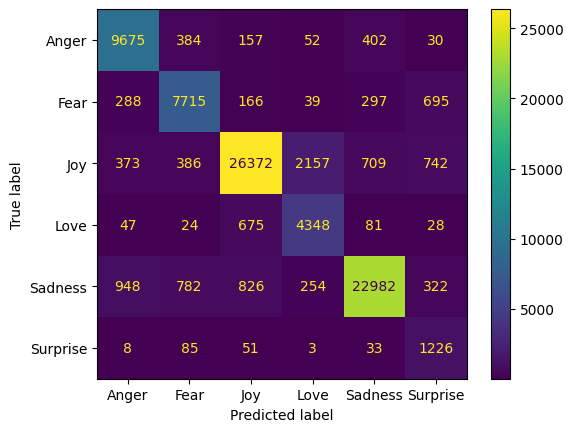

In [166]:
ConfusionMatrixDisplay(cm, display_labels = mnb.classes_ ).plot()

In [167]:
# ✅ Emotion examples
emotion_examples = {
    "Sadness": "I feel so lonely.",
    "Joy": "I am extremely happy and excited today!",
    "Love": "I cherish being loved.",
    "Anger": "I am so mad about this situation!",
    "Fear": "I'm terrified of what might happen next.",
    "Surprise": "I'm amazed!"
}

# ✅ Predicting Emotions
for emotion, sample_text in emotion_examples.items():
    # Vectorize the input
    sample_transformed = vec.transform([sample_text])

    # Predict the emotion
    predicted_label = mnb.predict(sample_transformed)[0]  # Directly a string label

    # No need for reverse mapping, directly compare
    predicted_emotion = predicted_label

    print(f"Input Text: {sample_text}")
    print(f"Expected Emotion: {emotion}")
    print(f"Predicted Emotion: {predicted_emotion}\n")

Input Text: I feel so lonely.
Expected Emotion: Sadness
Predicted Emotion: Sadness

Input Text: I am extremely happy and excited today!
Expected Emotion: Joy
Predicted Emotion: Joy

Input Text: I cherish being loved.
Expected Emotion: Love
Predicted Emotion: Love

Input Text: I am so mad about this situation!
Expected Emotion: Anger
Predicted Emotion: Anger

Input Text: I'm terrified of what might happen next.
Expected Emotion: Fear
Predicted Emotion: Fear

Input Text: I'm amazed!
Expected Emotion: Surprise
Predicted Emotion: Surprise



In [168]:
import pickle

# Assuming 'vec' is your CountVectorizer object
# and 'mnb' is your trained MultinomialNB model

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vec, f)

# Save the trained model
with open('emotion_model.pkl', 'wb') as f:
    pickle.dump(mnb, f)

# If you're running this in Google Colab, you can download the files:
try:
    from google.colab import files
    files.download('vectorizer.pkl')
    files.download('emotion_model.pkl')
    print("Files downloaded successfully.")
except ImportError:
    print("Files saved in current directory. Please download them manually.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Files downloaded successfully.


In [179]:
import pickle

# Load the model and vectorizer
with open('/content/emotion_model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

with open('/content/vectorizer.pkl', 'rb') as vec_file:
    vectorizer = pickle.load(vec_file)

# Test with a sample sentence
sample_text = ["She is very anxious"]
sample_vector = vectorizer.transform(sample_text)
prediction = model.predict(sample_vector)

print(f"Prediction: {prediction[0]}")

Prediction: Fear
